<a href="https://colab.research.google.com/github/DiyaSReddy/Matplotlib/blob/main/Matplotlib_mini_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving LandTemp.csv to LandTemp.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [ ]:
# Load dataset
df = pd.read_csv('/content/LandTemp.csv')

1. Line Graph: Global Temperature Changes over Decades

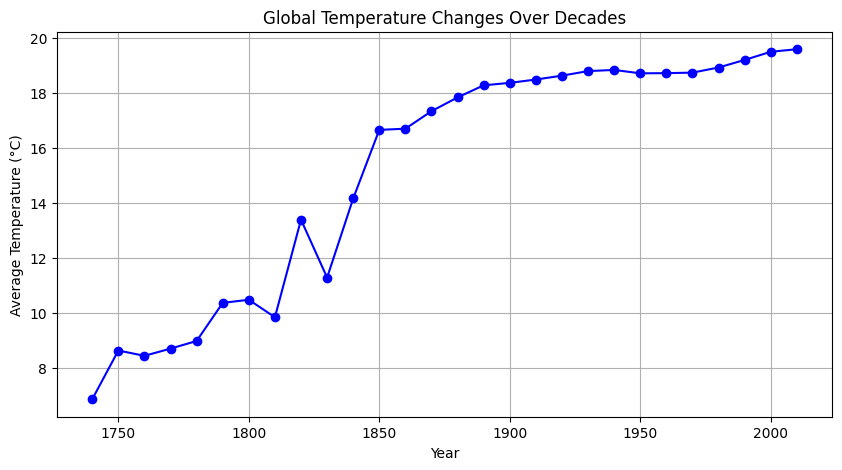

In [ ]:
# Convert date column to datetime format
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year

temp_decade = df.groupby((df['Year']//10)*10)['AverageTemperature'].mean()
plt.figure(figsize=(10, 5))
plt.plot(temp_decade.index, temp_decade.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Global Temperature Changes Over Decades")
plt.grid(True)
plt.show()

2. Heatmap: Temperature Variations by Country

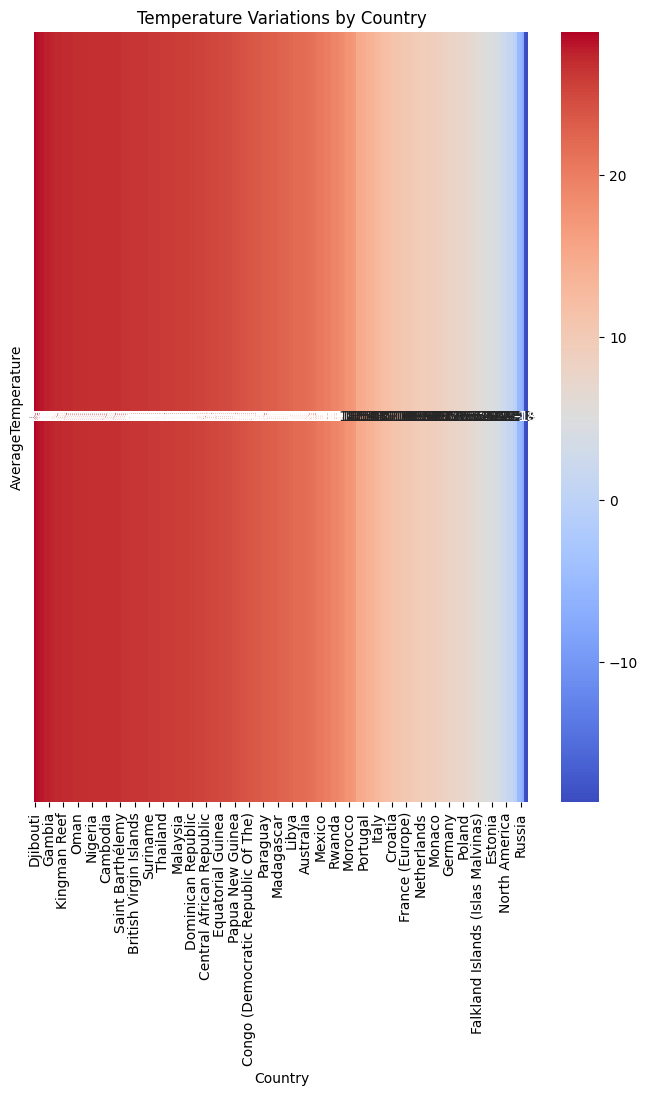

In [ ]:
count_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(8, 10))
count_new = count_temp.sort_values(by='AverageTemperature', ascending=False)
sns.heatmap(count_new.set_index('Country').T, cmap='coolwarm', annot=True)
plt.title("Temperature Variations by Country")
plt.show()

3. Bar Chart: Comparing Average Temperatures Across Continents (Using Approximate Mapping)


<ipython-input-14-3e0091e2437f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Continent', y='Average Temperature', data=temp, palette='viridis');


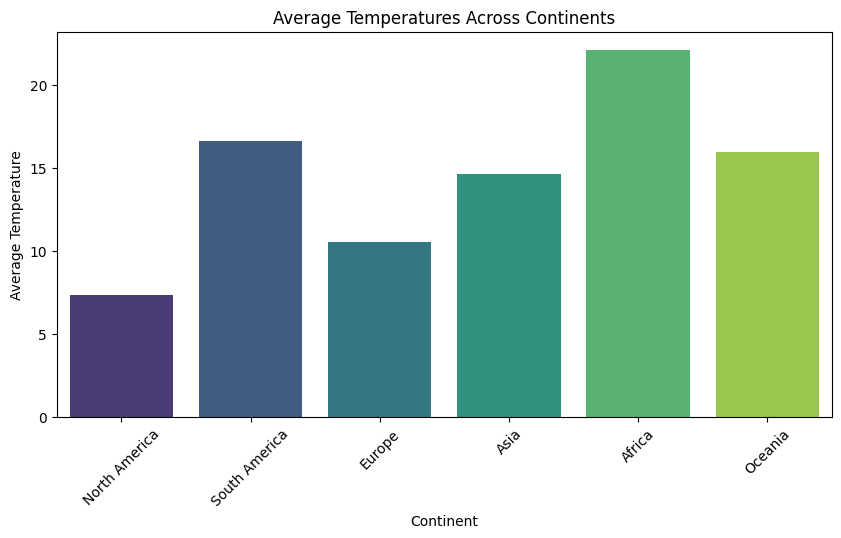

In [ ]:
continents = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy'],
    'Asia': ['China', 'India', 'Japan'],
    'Africa': ['South Africa', 'Egypt', 'Nigeria'],
    'Oceania': ['Australia', 'New Zealand']
}
avg_temp = {}
for continent, countries in continents.items():
    avg_temp[continent] = df[df['Country'].isin(countries)]['AverageTemperature'].mean()
temp = pd.DataFrame(list(avg_temp.items()), columns=['Continent', 'Average Temperature'])

plt.figure(figsize=(10, 5));
sns.barplot(x='Continent', y='Average Temperature', data=temp, palette='viridis');
plt.xticks(rotation=45);
plt.title("Average Temperatures Across Continents");
plt.show();

4. Box Plot: Seasonal Temperature Fluctuations


<ipython-input-15-7e689c688f40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AverageTemperature', data=df, palette='coolwarm')


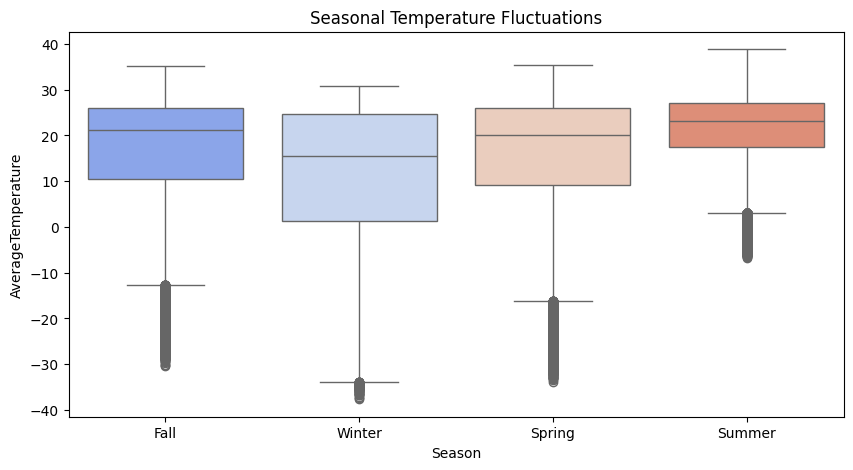

In [ ]:
df['Month'] = df['dt'].dt.month
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
df['Season'] = df['Month'].map(seasons)

plt.figure(figsize=(10, 5))
sns.boxplot(x='Season', y='AverageTemperature', data=df, palette='coolwarm')
plt.title("Seasonal Temperature Fluctuations")
plt.show()